In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcY2QtZGVza1xEb2N1bWVudHNccmVwb3NcY2QtcHVibGljLmdpdGh1Yi5pb1xjb3Vyc2VzXHJtbHMyNVxsZWNcc3Jj'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\cd-desk\AppData\Local\Temp\ipykernel_5832\3829031114.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap.py": 1723003352.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap_external.py": 1723003352.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\zipimport.py": 1723003352.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\codecs.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\aliases.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\__init__.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\utf_8.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\cp1252.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\abc.py": 1723003350.0, "C:\\Users\\cd-desk\\AppData\\Local\\Prog

In [2]:
import subprocess  # A base package we need to install other packages
import sys         # A base package we need to install other packages
install = lambda package : subprocess.check_call([sys.executable, 
                                                  '-m', 
                                                  'pip', 
                                                  'install', 
                                                  package])

In [3]:
python_data_stack = ["numpy", "pandas", "matplotlib", "seaborn"]
r_data_stack = ['pyreadr', 'statsmodels']
packages = python_data_stack + r_data_stack + ["scikit-learn"]

_ = [install(package) for package in packages]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pyreadr
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
# Common to include parts of, not all of, sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
url = 'https://cd-public.github.io/courses/rmls25/dat/'
rds = 'wine.rds'
pyreadr.download_file(url + rds, rds) 
wine = pyreadr.read_r(rds)[None]      
wine.dropna(subset=['points','price'])
str(wine.info()) # string for slide formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89556 entries, 0 to 89555
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     89556 non-null  float64
 1   country                89503 non-null  object 
 2   description            89556 non-null  object 
 3   designation            64356 non-null  object 
 4   points                 89556 non-null  float64
 5   price                  89556 non-null  float64
 6   province               89503 non-null  object 
 7   region_1               71712 non-null  object 
 8   region_2               33081 non-null  object 
 9   taster_name            89556 non-null  object 
 10  taster_twitter_handle  84953 non-null  object 
 11  title                  89556 non-null  object 
 12  variety                89556 non-null  object 
 13  winery                 89556 non-null  object 
 14  year                   89556 non-null  float64
dtypes:

'None'

In [8]:
wine['bordeaux'] = wine['province'] == 'Bordeaux'
wine.head(2)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,bordeaux
0,1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,False
1,2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,False


In [9]:
m1 = sm.OLS(wine['points'], wine['price']).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 points   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                          6.331e+04
Date:                Thu, 26 Dec 2024   Prob (F-statistic):                        0.00
Time:                        23:56:23   Log-Likelihood:                     -5.0481e+05
No. Observations:               89556   AIC:                                  1.010e+06
Df Residuals:                   89555   BIC:                                  1.010e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.0169      0.004    251.623      0.000       1.009       1.025
==============================================================================
Omnibus:                   199847.674   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3451086699.000
Skew:                         -20.492   Prob(JB):                         0.00
Kurtosis:                     963.819   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
s1 = LinearRegression().fit(wine[['points']],wine['price'])
f'Intercept: {s1.intercept_}, Coefficients: {s1.coef_}'

'Intercept: -489.2508038352233, Coefficients: [5.92019824]'

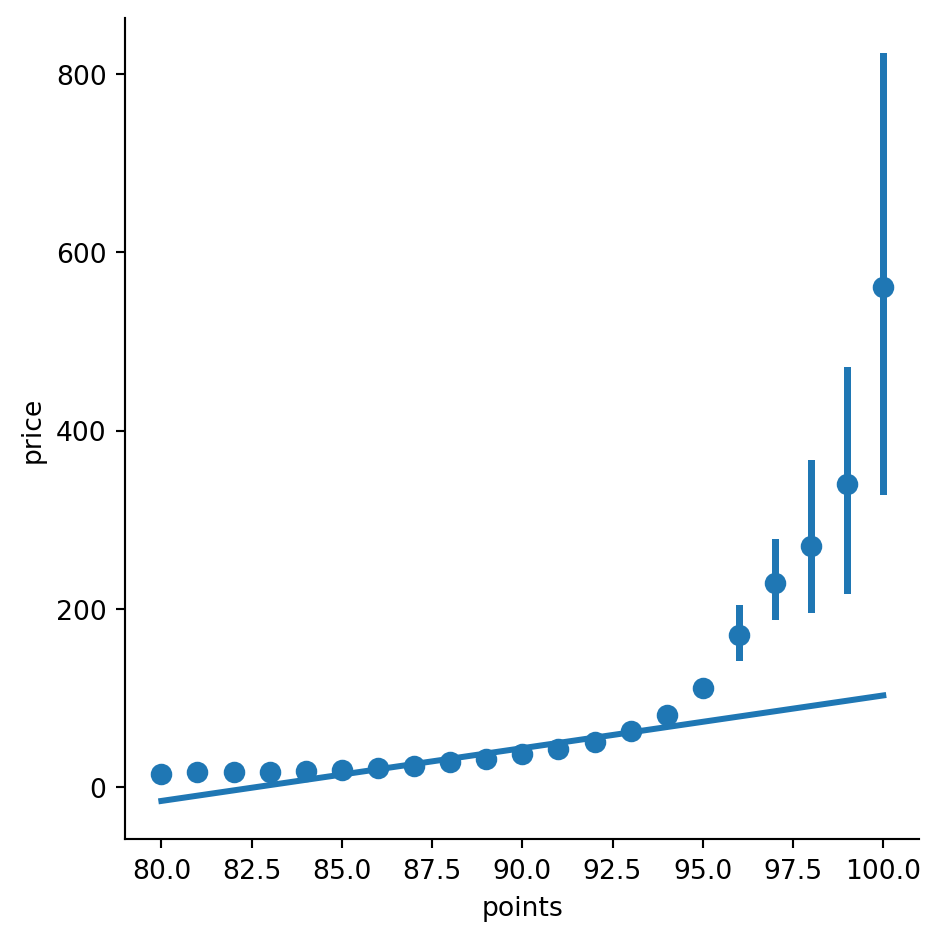

In [11]:
sns.lmplot(x='points', y='price', 
           data=wine, scatter=True, 
           x_bins=range(80,101))

In [12]:
m2 = smf.ols('price ~ points + bordeaux', data=wine).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8857.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:56:29   Log-Likelihood:            -4.5673e+05
No. Observations:               89556   AIC:                         9.135e+05
Df Residuals:                   89553   BIC:                         9.135e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -491.8296      3.970   -123.897      0.000    -499.610    -484.049
bordeaux[T.True]     8.7090      0.661     13.182      0.000       7.414      10.004
points               5.9451      0.045    132.878      0.000       5.857       6.033
==============================================================================
Omnibus:                   209113.996   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5148121806.319
Skew:                          22.820   Prob(JB):                         0.00
Kurtosis:                    1176.693   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
m3 = smf.ols('price ~ points * bordeaux', data=wine).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     6421.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:56:29   Log-Likelihood:            -4.5609e+05
No. Observations:               89556   AIC:                         9.122e+05
Df Residuals:                   89552   BIC:                         9.122e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -460.8522      4.034   -114.233      0.000    -468.759    -452.945
bordeaux[T.True]         -665.8277     18.763    -35.486      0.000    -702.604    -629.052
points                      5.5958      0.045    123.063      0.000       5.507       5.685
points:bordeaux[T.True]     7.6585      0.213     35.972      0.000       7.241       8.076
==============================================================================
Omnibus:                   207559.719   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5054712547.121
Skew:                          22.390   Prob(JB):                         0.00
Kurtosis:                    1166.014   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
wine['points_bordeaux'] = wine['points'] * wine['bordeaux']

s3 = LinearRegression().fit(wine[['points','bordeaux']],
                            wine['price'])
f'Intercept: {s3.intercept_}, Coefficients: {s3.coef_}'

'Intercept: -491.829643567971, Coefficients: [5.9451492  8.70900299]'

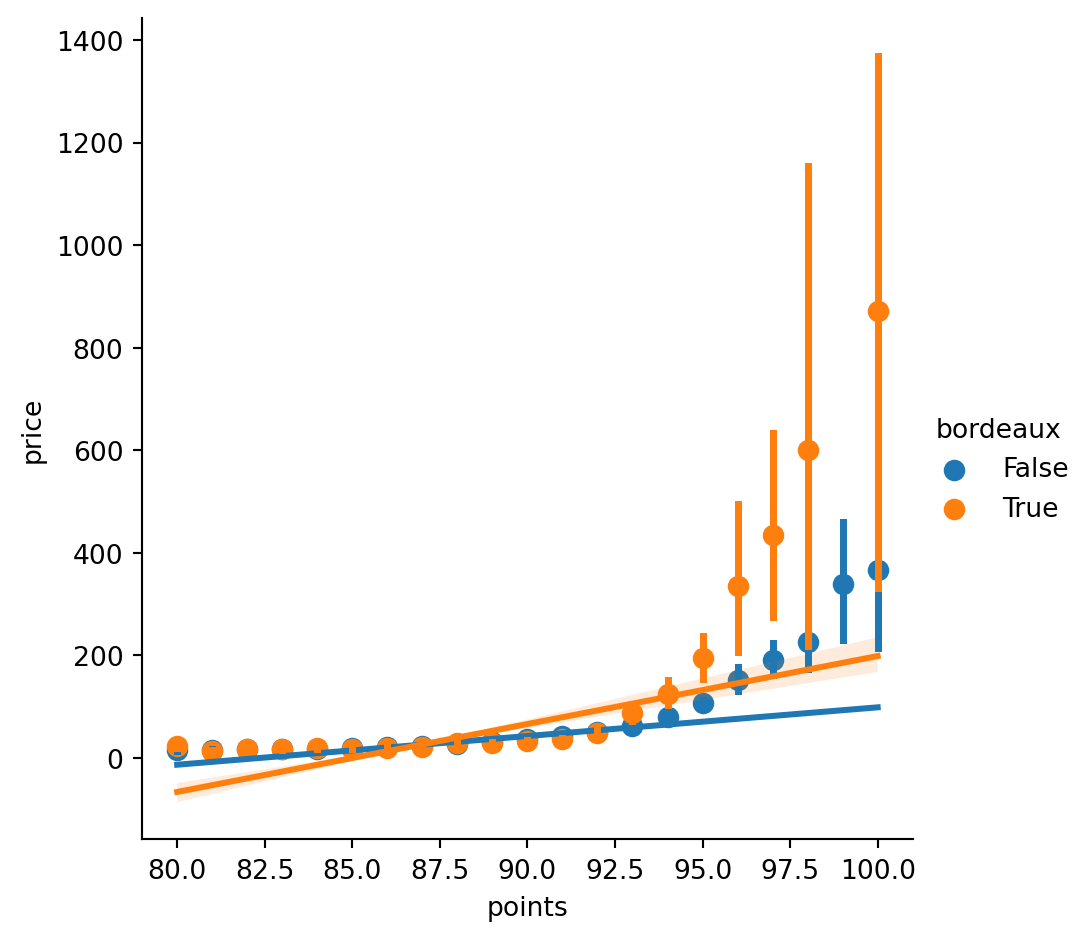

In [15]:
sns.lmplot(x='points', y='price', 
           data=wine, scatter=True, 
           x_bins=range(80,101), hue='bordeaux')

In [16]:
random_seed = 505
train, test = train_test_split(wine, random_state=random_seed)
print(test.head())

             id   country                                        description  \
65856   95817.0        US  The appellation continues to impress with this...   
71192  103509.0   Romania  This easy-drinking red wine has aromas of cher...   
29519   43024.0  Portugal  A blend of Tinta Roriz and the local Jaen, thi...   
23597   34478.0        US  This is the producer's annual unoaked version ...   
42843   62706.0   Germany  Delicate quince and apple aromas are fringed w...   

                     designation  points  price         province  \
65856              Frank Johnson    90.0   14.0       California   
71192                  Dreambird    86.0    7.0  Viile Timisului   
29519       Beyra Colheita Tinto    87.0   12.0   Beira Interior   
23597  Acero Don Miguel Vineyard    88.0   29.0       California   
42843                        NaN    87.0   13.0            Mosel   

                   region_1 region_2         taster_name  \
65856      Dry Creek Valley   Sonoma      Virginie

In [17]:
formulas = ['price ~ points', 
            'price ~ points + bordeaux', 
            'price ~ points * bordeaux']
ms = [smf.ols(f, data=train).fit() for f in formulas]

In [18]:
def rmse(m):
  residuals_sq = (test['price'] - m.predict(test)) ** 2
  mse = np.mean(residuals_sq)
  return mse ** .5

[rmse(m) for m in ms]

[np.float64(38.253198876742374),
 np.float64(38.208086530739),
 np.float64(37.80098647775707)]

In [19]:
is_reserve = lambda x: str(x).lower() in ['reserve','reserva','riserva']
wine['reserve'] = wine['designation'].apply(is_reserve)

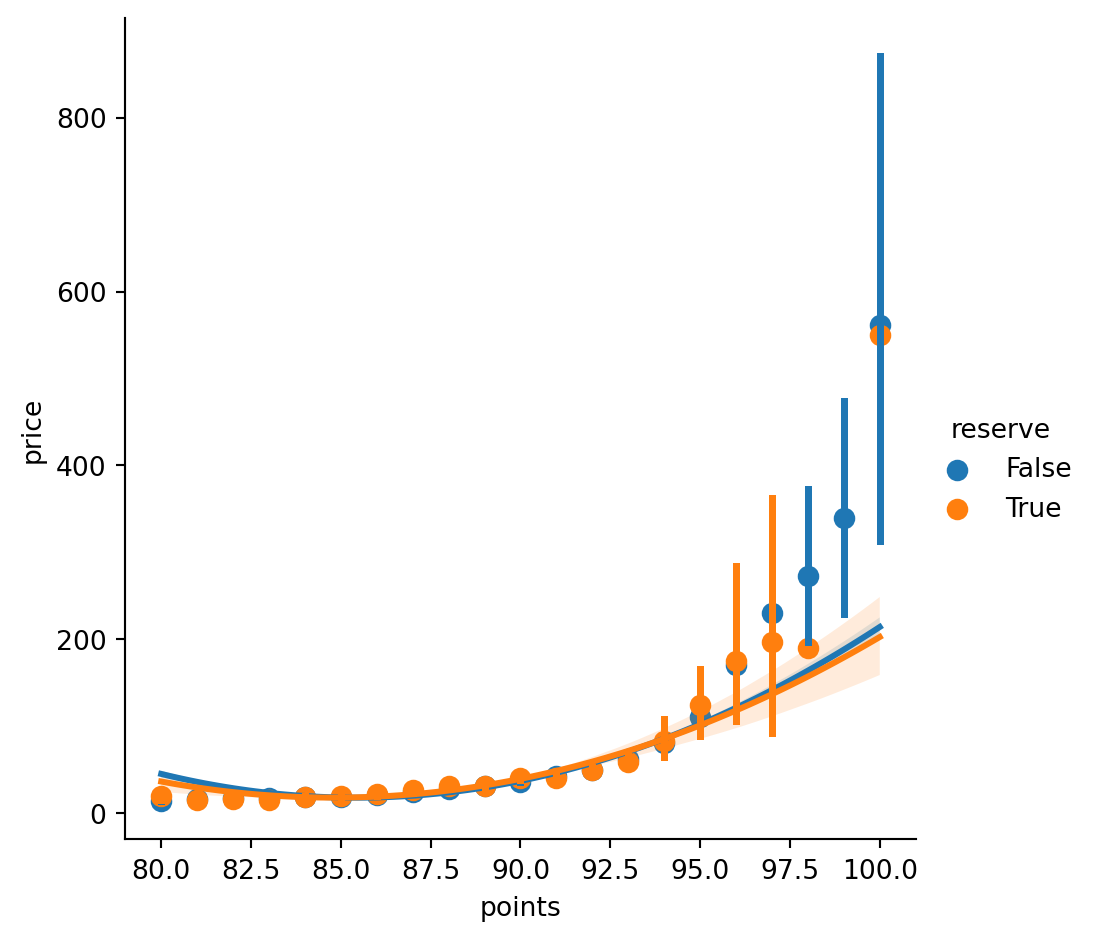

In [20]:
sns.lmplot(wine, x='points', y='price', x_bins=range(80,101), hue='reserve',
           x_estimator=np.mean, order=2) # polynomail regression, why not

In [21]:
url = 'https://github.com/rafalab/dslabs/raw/master/data/'
rds = 'heights.rda'
pyreadr.download_file(url + rds, rds) 
heights = pyreadr.read_r(rds)['heights']      
random_seed = 505
train, test = train_test_split(heights, random_state=random_seed)

In [22]:
y_hat = np.random.choice(['Male', 'Female'], len(test))

In [23]:
np.mean(y_hat == test['sex'])

np.float64(0.49049429657794674)

In [24]:
hs = heights.groupby('sex')['height']
hs.std(), hs.mean()

C:\Users\cd-desk\AppData\Local\Temp\ipykernel_5832\2597461960.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(sex
 Female    3.760656
 Male      3.611024
 Name: height, dtype: float64,
 sex
 Female    64.939424
 Male      69.314755
 Name: height, dtype: float64)

In [25]:
male_mean_less_2sd = hs.mean()['Male'] - 2*hs.std()['Male']

y_hat = heights['height'].apply(lambda x : 'Male' if x > male_mean_less_2sd else 'Female')

print(male_mean_less_2sd, np.mean(heights['sex'] == y_hat))

62.09270759210095 0.7933333333333333


In [26]:
cutoff = list(range(61,71))

def get_accuracy(y):
  f = lambda x : 'Male' if x > y else 'Female'
  y_hat = heights['height'].apply(f)
  return np.mean(heights['sex'] == y_hat)

accuracy = list(map(get_accuracy, cutoff))

accuracy

[np.float64(0.7819047619047619),
 np.float64(0.7933333333333333),
 np.float64(0.8085714285714286),
 np.float64(0.8266666666666667),
 np.float64(0.8266666666666667),
 np.float64(0.8019047619047619),
 np.float64(0.7371428571428571),
 np.float64(0.6819047619047619),
 np.float64(0.5914285714285714),
 np.float64(0.5085714285714286)]

Optimal cutoff is 64


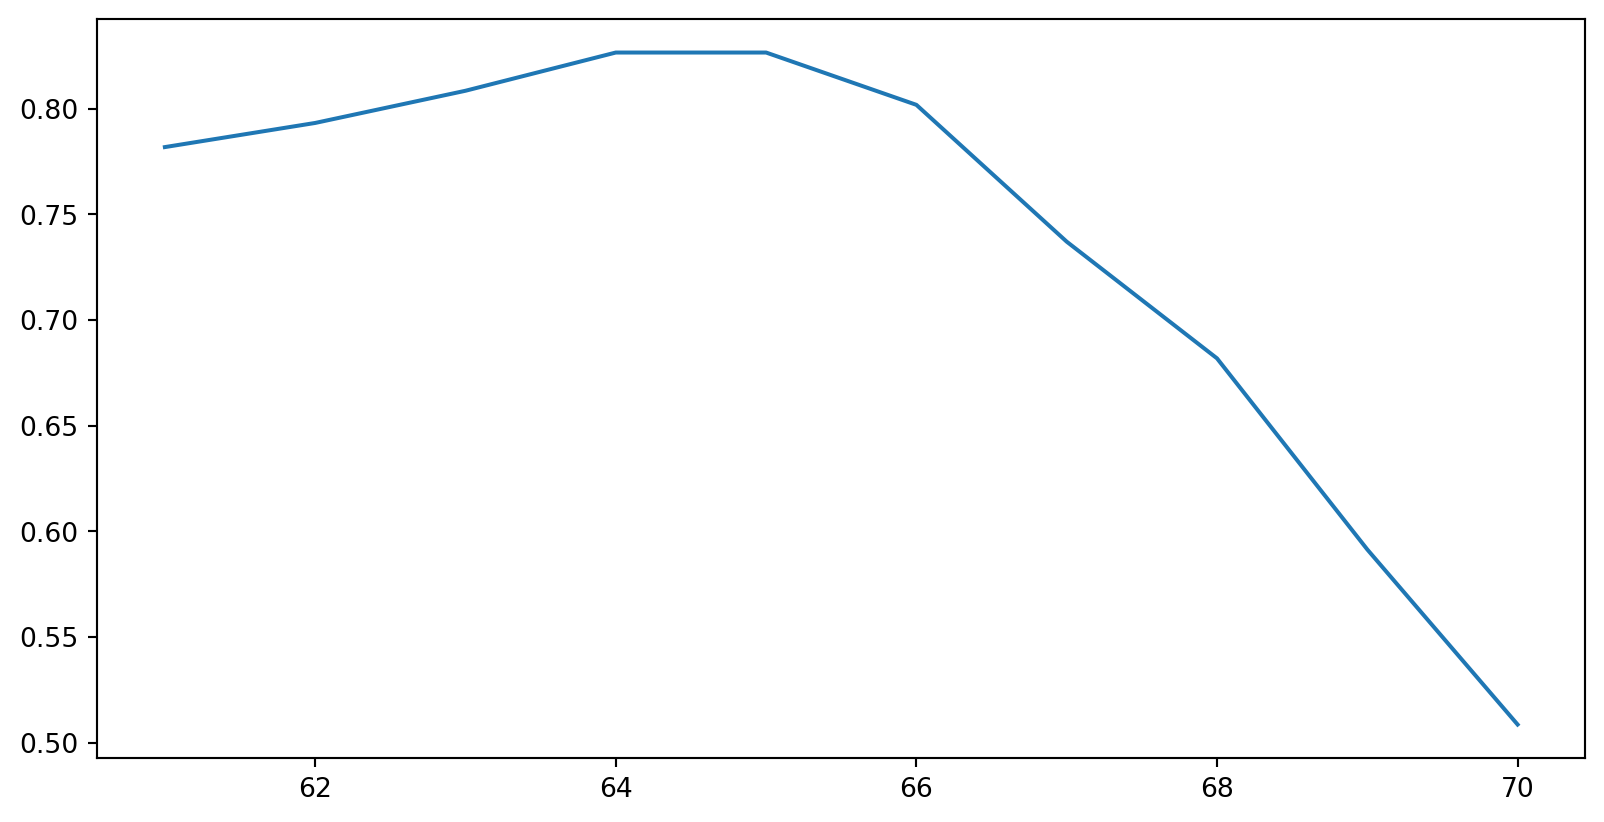

In [27]:
best_cutoff = cutoff[np.argmax(accuracy)]
_ = plt.plot(cutoff, accuracy), print('Optimal cutoff is', best_cutoff)

In [28]:
heights['y_hat'] = heights['height'].apply(lambda x : 'Male' if x > best_cutoff else 'Female')

print('Accuracy is', np.mean(heights['sex'] == y_hat))

Accuracy is 0.7933333333333333


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21686fd5580>,
 None)

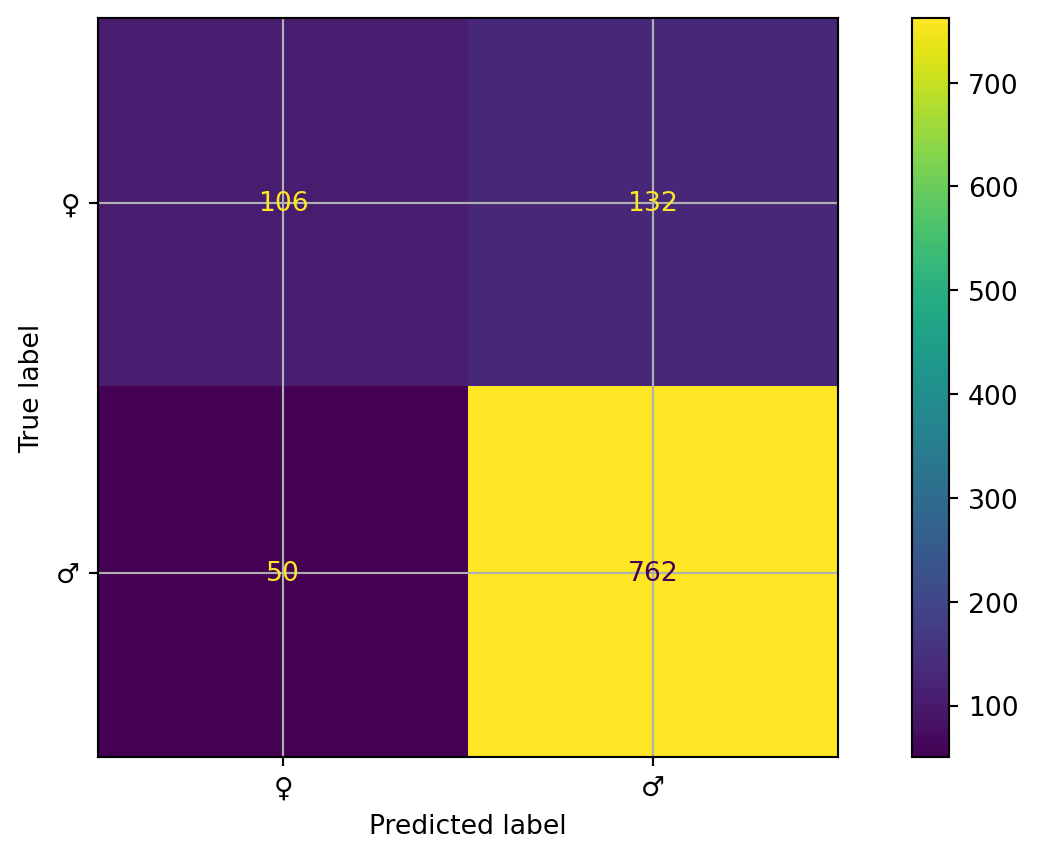

In [29]:
ConfusionMatrixDisplay(confusion_matrix(heights['sex'], heights['y_hat']), 
                       display_labels=['♀','♂']).plot(), plt.grid(None)

In [30]:
heights['acc'] = heights['sex'] == heights['y_hat']
heights.groupby('sex')['acc'].mean()

C:\Users\cd-desk\AppData\Local\Temp\ipykernel_5832\682199033.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



sex
Female    0.445378
Male      0.938424
Name: acc, dtype: float64

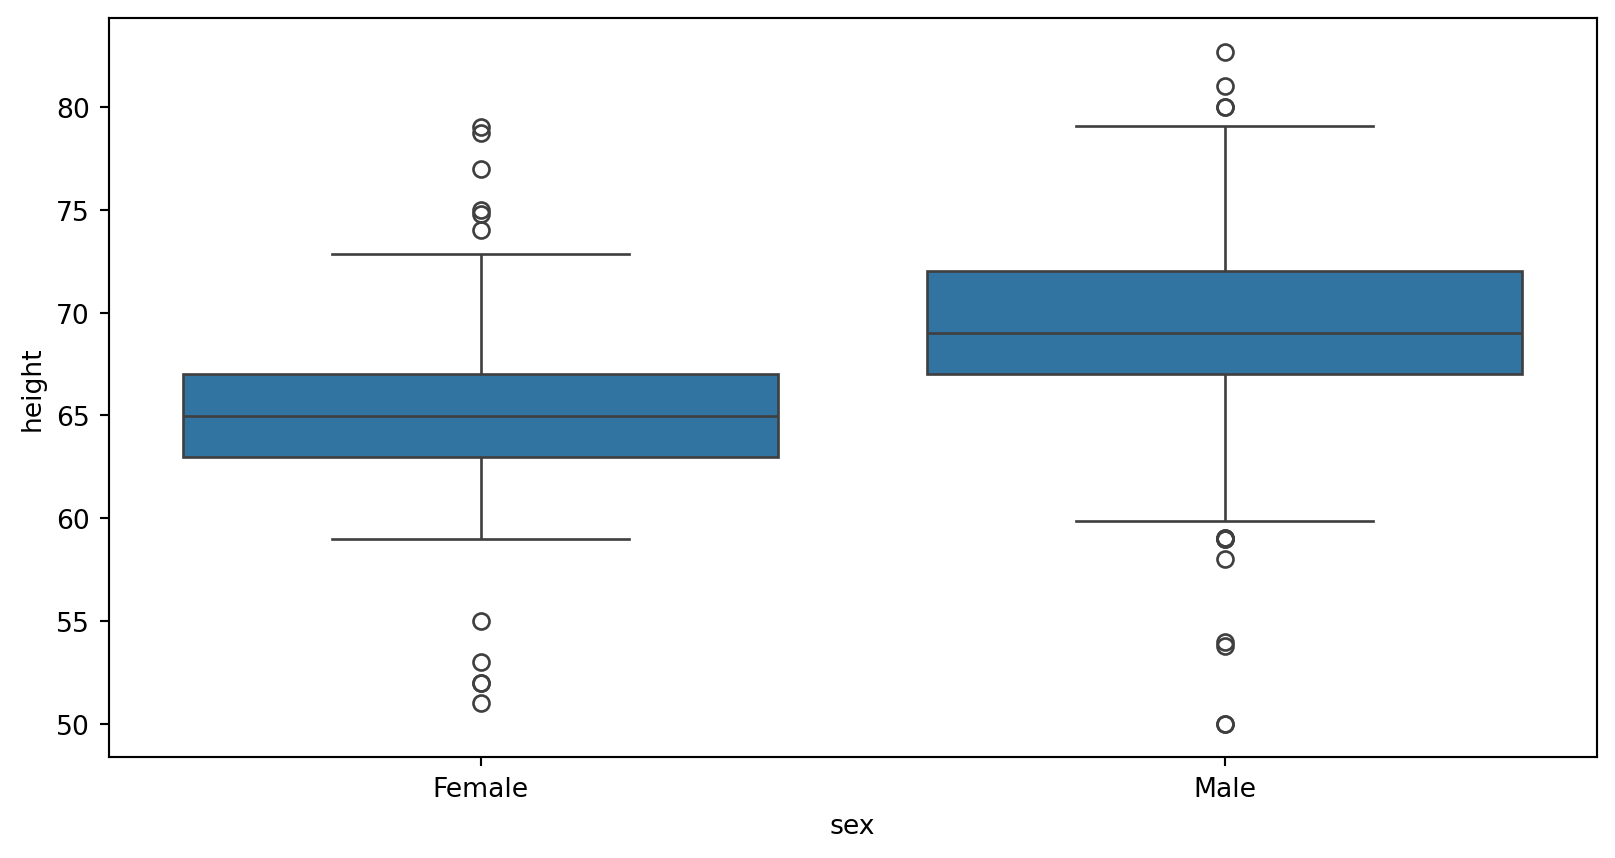

In [31]:
_ = sns.boxplot(heights, x='sex',y='height')

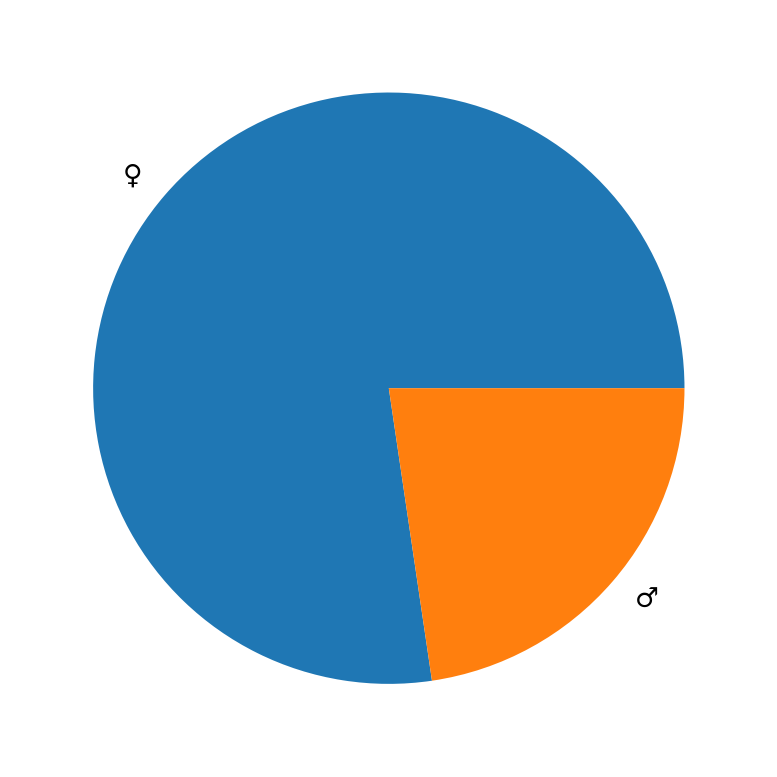

In [32]:
_ = plt.pie(heights['sex'].value_counts(), labels=['♀','♂'])